In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import matplotlib.axes as axe
import matplotlib.ticker as tkr
import matplotlib.widgets as wdg
import statistics as stat
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit as cf
from sklearn.metrics import r2_score

df = pd.read_csv(r'C:\Users\chisi\Downloads\PhenoCam Stuff\TimeSeriesProvisionalData\arbutuslake_DB_1000_provisional_data\provisional_data\data_record_3\arbutuslake_DB_1000_roistats.csv')


In [6]:
df2 = df.groupby('date')['gcc'].quantile(0.90)
df2 = pd.DataFrame(df2)

gcc90 = {"Date" : [],
         "GccPer90" : []}

gccSMA = {"Date" : [],
          "GccPer90" : []}

for x in range(184, 184+1707):
    gcc90["Date"].append(df2.index[x])
    gcc90["GccPer90"].append(df2["gcc"].iloc[x])
    
    GccSMA = (df2['gcc'].iloc[x+2] + (df2['gcc'].iloc[x]) + (df2['gcc'].iloc[x-1])) / 3
    gccSMA['GccPer90'].append(GccSMA)
    gccSMA['Date'].append(df2.index[x])   
    
gcc90 = pd.DataFrame(gcc90)
#gcc90.plot()

gccSMA = pd.DataFrame(gccSMA)

#plt.figure(figsize=(10,5), dpi=100)

#gcc90['GccPer90'].plot(label='GccPer90', color = 'darksalmon', kind='line', linewidth=2, animated=True)
#gccSMA['GccPer90'].plot(label='Simple Moving Average' , color='cornflowerblue',linewidth=2 , linestyle=':', animated=True)

#plt.title('GccPer90 for 2009')

#plt.legend()
#plt.tick_params(axis='x', labelrotation=90)
#plt.xticks(ticks=(1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335),
 #          labels=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
  #                 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

In [15]:
df3 = df.groupby('doy')['gcc'].quantile(0.90)
df3 = pd.DataFrame(df3)

DOYgcc90 = {'DOY' : [],
            'Gcc90' : []}
DOYgccSMA = {'DOY' : [],
             'GccSMA' : []}

for x in range(365):
    DOYgcc90['DOY'].append(df3.index[x])
    DOYgcc90['Gcc90'].append(df3['gcc'].iloc[x])
    
    Smooth = (df3['gcc'].iloc[x+1] + df3['gcc'].iloc[x] + df3['gcc'].iloc[x-1]) /3
    DOYgccSMA['GccSMA'].append(Smooth)
    DOYgccSMA['DOY'].append(df3.index[x])
    
DOYgcc90 = pd.DataFrame(DOYgcc90)
DOYgccSMA = pd.DataFrame(DOYgccSMA)

In [22]:
x, y = DOYgccSMA['DOY'], DOYgccSMA['GccSMA']
def fourier(t, ang1, ang2, ang3):
    return ang1 + ang2*np.sin(365*t) + ang3*np.cos(365*t)
popt, pcov = cf(fourier, x, y)
t, ang1, ang2, ang3 = popt

ValueError: not enough values to unpack (expected 4, got 3)

([<matplotlib.axis.XTick at 0x20b69870e50>,
 [Text(1, 0, 'Jan'),
  Text(32, 0, 'Feb'),
  Text(60, 0, 'Mar'),
  Text(91, 0, 'Apr'),
  Text(121, 0, 'May'),
  Text(152, 0, 'June'),
  Text(182, 0, 'July'),
  Text(213, 0, 'Aug'),
  Text(244, 0, 'Sep'),
  Text(274, 0, 'Oct'),
  Text(305, 0, 'Nov'),
  Text(335, 0, 'Dec')])

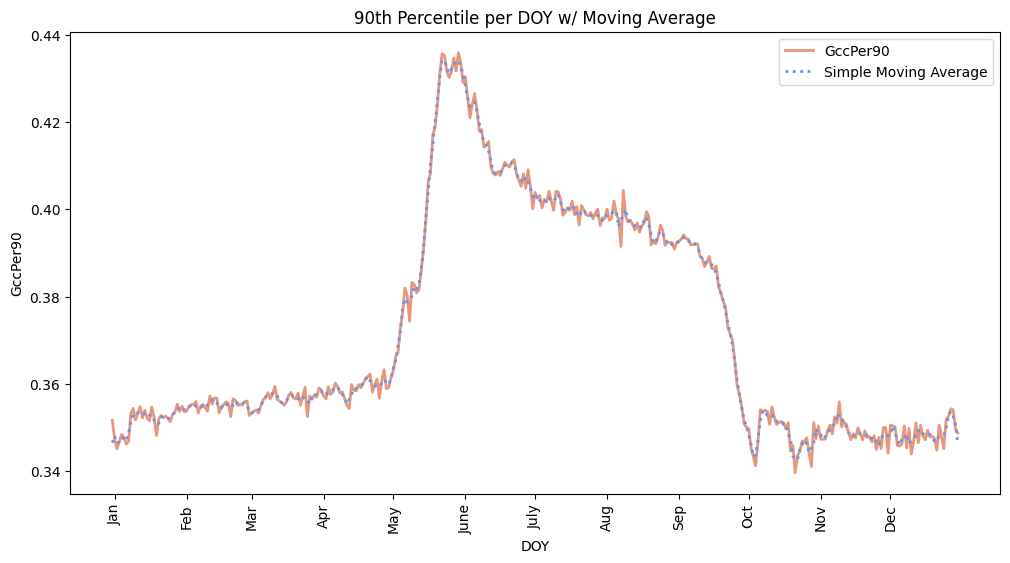

In [16]:
plt.figure(figsize=(12,6), dpi=100)
DOYgcc90['Gcc90'].plot(label='GccPer90', color = 'darksalmon', kind='line', linewidth=2, animated=True)
DOYgccSMA['GccSMA'].plot(label='Simple Moving Average' , color='cornflowerblue',linewidth=2 , linestyle=':', animated=True)
plt.title('90th Percentile per DOY w/ Moving Average')
plt.xlabel('DOY')
plt.ylabel('GccPer90')
plt.legend()
plt.tick_params(axis='x', labelrotation=90)
plt.xticks(ticks=(1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335),
               labels=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))